In [37]:
import numpy as np
import open3d as o3d

def read_ply(filename):
    mesh = o3d.io.read_triangle_mesh(filename)
    return mesh

ply_filename = "D:/aaaaaaaaaaaaaaaaa/23-24/astar/1-2data/ScanNet/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.labels.ply"
mesh = read_ply(ply_filename)

vertices = np.asarray(mesh.vertices)
vertex_colors = np.asarray(mesh.vertex_colors)

vis_mesh = o3d.geometry.TriangleMesh()
vis_mesh.vertices = o3d.utility.Vector3dVector(vertices)
vis_mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles))
vis_mesh.vertex_colors = o3d.utility.Vector3dVector(vertex_colors)

o3d.visualization.draw_geometries([vis_mesh])


[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [38]:
import vtk

# Load the PLY file
reader = vtk.vtkPLYReader()
reader.SetFileName("D:/aaaaaaaaaaaaaaaaa/23-24/astar/1-2data/ScanNet/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.labels.ply")
reader.Update()

# Create a bounding box
bounds = reader.GetOutput().GetBounds()
bounding_box = vtk.vtkCubeSource()
bounding_box.SetBounds(bounds)

# Visualize the mesh and bounding box
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(reader.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)

bounding_box_mapper = vtk.vtkPolyDataMapper()
bounding_box_mapper.SetInputConnection(bounding_box.GetOutputPort())

bounding_box_actor = vtk.vtkActor()
bounding_box_actor.SetMapper(bounding_box_mapper)
bounding_box_actor.GetProperty().SetColor(1, 1, 1)
bounding_box_actor.GetProperty().SetRepresentationToWireframe()

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.AddActor(bounding_box_actor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

renderWindow.Render()
renderWindowInteractor.Start()


e:\anaconda\envs\visual\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


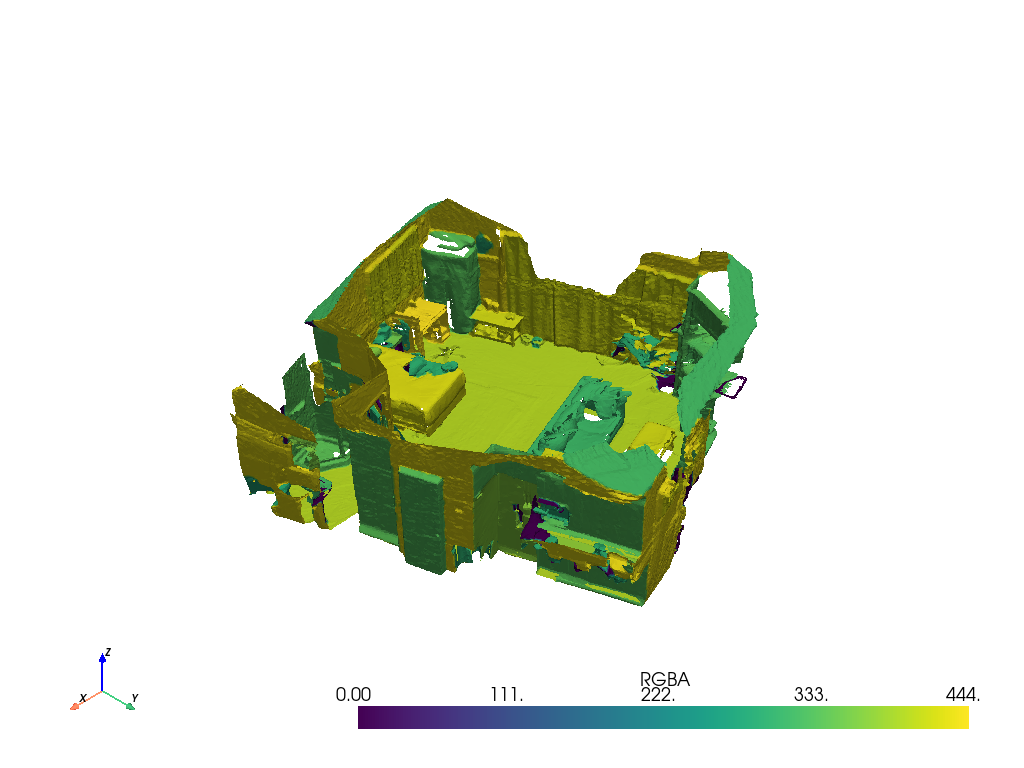

In [39]:
import pyvista as pv

# Load the PLY file
mesh = pv.read("D:/aaaaaaaaaaaaaaaaa/23-24/astar/1-2data/ScanNet/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.labels.ply")

# Visualize the mesh
mesh.plot()


In [40]:
import pyvista as pv

# Load the PLY file
ply_path = "D:/aaaaaaaaaaaaaaaaa/23-24/astar/1-2data/ScanNet/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.labels.ply"

# Print array names and information
print("Array names:", point_cloud.array_names)


Array names: ['RGBA']


[[219 219 141 240]
 [219 219 141 240]
 [219 219 141 240]
 ...
 [174 199 232 255]
 [174 199 232 255]
 [174 199 232 255]]
[[219 219 141]
 [219 219 141]
 [219 219 141]
 ...
 [174 199 232]
 [174 199 232]
 [174 199 232]]


e:\anaconda\envs\visual\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.ui.vuetify'

Falling back to a static output.
  warnings.warn(


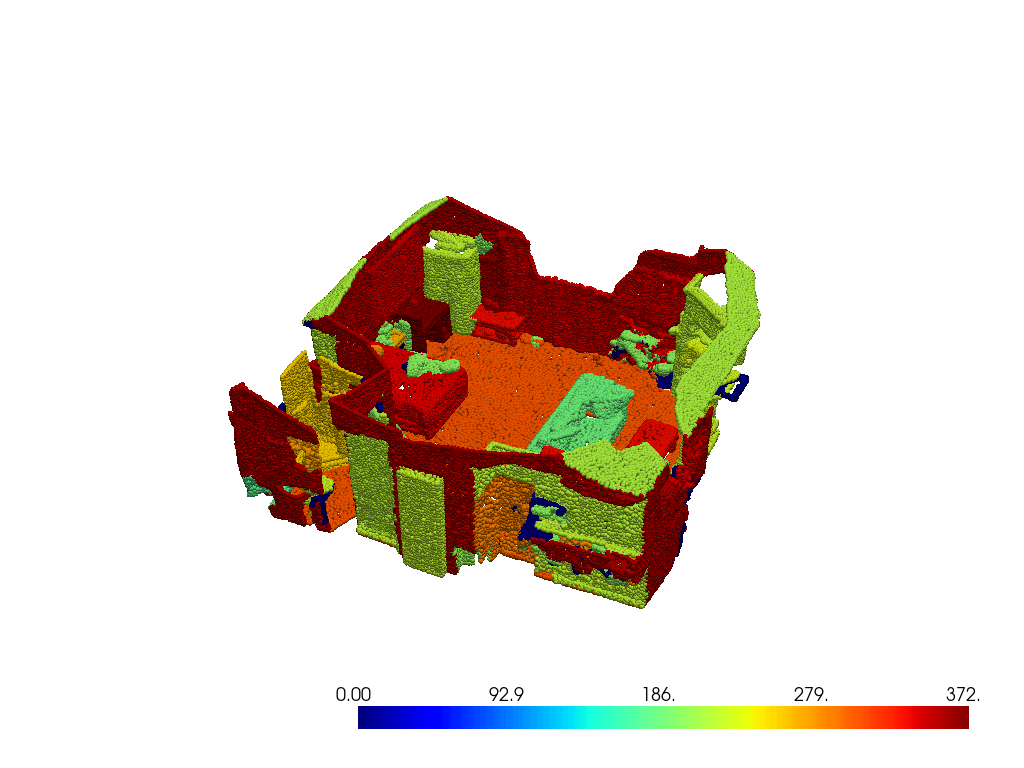

In [41]:
import pyvista as pv

# Load the PLY file
ply_path = "D:/aaaaaaaaaaaaaaaaa/23-24/astar/1-2data/ScanNet/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.labels.ply"
point_cloud = pv.read(ply_path)

rgba_colors = point_cloud["RGBA"]
print(rgba_colors)

colors = rgba_colors[:, :3]
print(colors)

mesh = pv.PolyData(point_cloud.points)
mesh.point_data["colors"] = colors

plotter = pv.Plotter()
plotter.add_mesh(mesh, scalars=colors, render_points_as_spheres=True, cmap="jet")
plotter.show()

